In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl

In [4]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

## 엣지 추출

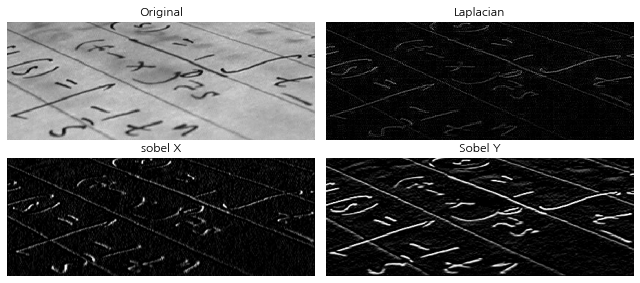

In [5]:
from skimage.data import text
import cv2

img = text()

sobelx = cv2.Sobel(img, cv2.CV_8U, 1, 0, ksize = 3)
sobely = cv2.Sobel(img, cv2.CV_8U, 0, 1, ksize = 3)
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.figure(figsize = (9, 4))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobelx, cmap = 'gray')
plt.title('sobel X')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')
plt.axis('off')
plt.tight_layout()
plt.show()

## 캐니 엣지 추출

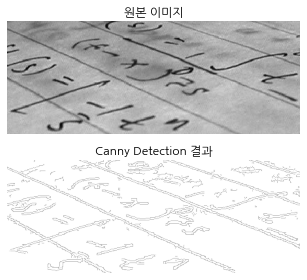

In [9]:
img = text()
edges = cv2.Canny(img, 50, 100)

plt.subplot(2, 1, 1)
plt.imshow(img, cmap = 'gray')
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(edges, cmap = 'Greys', alpha = 0.3)
plt.axis('off')
plt.title('Canny Detection 결과')
plt.tight_layout()
plt.show()

## 해리스 코너 추출

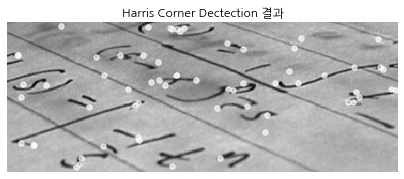

In [11]:
dst = cv2.cornerHarris(img, 2, 3, 0.24)

#thresholding
ret, dst = cv2.threshold(dst, 0.001*dst.max(), 1, 0)

x, y = np.nonzero(dst)

plt.figure(figsize = (7, 7))
plt.title('Harris Corner Dectection 결과')
plt.axis('off')
plt.imshow(img, cmap = 'gray')
plt.scatter(y, x, s=30, c='w', alpha=0.7)
plt.show()

## Shi & Tomasi 코너 추출

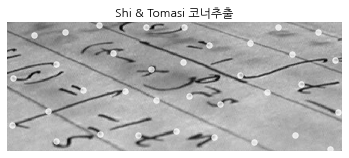

In [12]:
corners = cv2.goodFeaturesToTrack(img, 100, 0.001, 40)
corners = np.int0(corners)

plt.title('Shi & Tomasi 코너추출')
plt.imshow(img, cmap = "gray")
plt.scatter(corners[:, 0, 0], corners[:, 0, 1], s=30, c= "w", alpha=0.7)
plt.axis('off')
plt.show()

## 허프 라인 변환

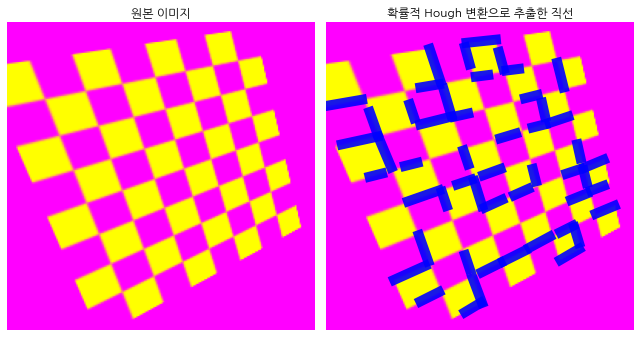

In [25]:
from skimage.data import checkerboard

img = checkerboard()
rows, cols = img.shape

pts1 = np.float32([[25, 25], [175, 25], [25, 175], [175, 175] ])
pts2= np.float32([[25, 50], [150, 25], [75, 175], [175, 125] ])

H = cv2.getPerspectiveTransform(pts1, pts2)
img = cv2.warpPerspective(img, H, (cols, rows))

edges = cv2.Canny(img, 100, 150, apertureSize = 3)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, 50, 8)

plt.figure(figsize = (9, 7))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'spring')
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap = 'spring')
plt.axis('off')
for i in range(len(lines)):
    for x1, y1, x2, y2 in lines[i]:
        plt.plot([x1, x2], [y1, y2], c = 'b',lw=10, alpha=0.9)
plt.title('확률적 Hough 변환으로 추출한 직선')

plt.tight_layout()
plt.show()


## 이미지 히스토그램

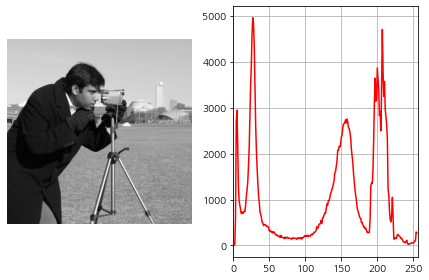

In [54]:
from skimage.data import camera
img = camera()

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.subplot(121)
plt.imshow(img, "gray")
plt.axis("off")
plt.subplot(122)
plt.plot(hist, color='r')
plt.grid('True')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

## SIFT

In [42]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install opencv-contrib-python

  Using cached opencv_contrib_python-4.5.5.62-cp36-abi3-win_amd64.whl (42.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from skimage.data import camera
img = camera()

rows, cols = img.shape
H = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 0.7)
img_rotated = cv2.warpAffine(img, H, (cols, rows))
sift = cv2.xfeatures2d.SIFT_create()
kps, des = sift.detectAndCompute(img, None)
kps_r, des_r = sift.detectAndCompute(img_rotated, None)
kp0 = kps[0]
print("pt=({},{}), size={}, angle={}".format(kp0.pt[0], kp0.pt[1], kp0.size, kp0.angle))

pt=(3.8693153858184814,185.40830993652344), size=2.643397092819214, angle=271.9088134765625


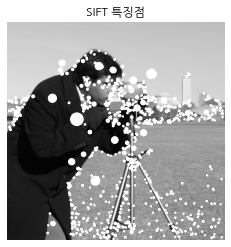

In [7]:
bf = cv2.BFMatcher_create()
matches = bf.knnMatch(des, des_r, k=2)

good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)

pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size for kp in kps]

plt.imshow(img, cmap="gray")
plt.title("SIFT 특징점")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()


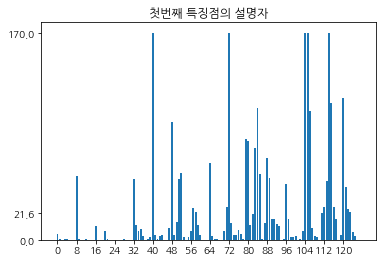

In [8]:
plt.bar(np.arange(len(des[0])), des[0])
plt.xticks(range(0, len(des[0]), 8))
plt.yticks([des[0].min(), des[0].mean(), des[0].max()])
plt.title("첫번째 특징점의 설명자")
plt.show()

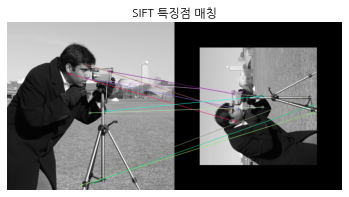

In [9]:
plt.imshow(image_match)
plt.title("SIFT 특징점 매칭")
plt.axis("off")
plt.show()

## FAST

기준값 :  10
nonmaxSuppression :  True
nonmaxSuppression 후처리 후, 추출된 전체 특징점 :  6155


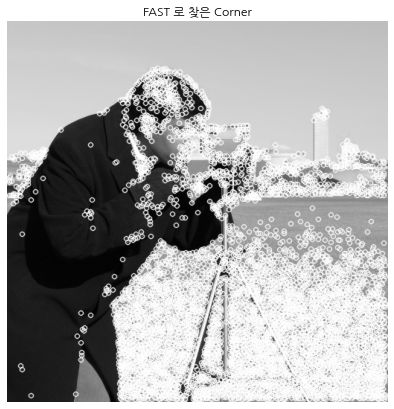

In [12]:
fast = cv2.FastFeatureDetector_create()
kps = fast.detect(img, None)
img2 = cv2.drawKeypoints(img, kps, img, color=(255, 255, 255))

print('기준값 : ', fast.getThreshold())
print('nonmaxSuppression : ', fast.getNonmaxSuppression())
print('nonmaxSuppression 후처리 후, 추출된 전체 특징점 : ', len(kps))
plt.figure(figsize=(7, 7))
plt.imshow(img2, cmap = 'gray')
plt.title('FAST 로 찾은 Corner')
plt.axis('off')
plt.show()


## ORB

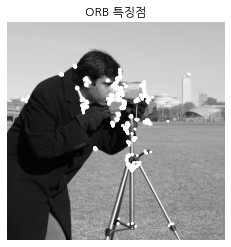

In [13]:
orb = cv2.ORB_create()
kps, des = orb.detectAndCompute(img, None)
kps_r, des_r = orb.detectAndCompute(img_rotated, None)

bf = cv2.BFMatcher_create()
matches = bf.knnMatch(des, des_r, k=2)

good = []
for m, n in matches:
    if m.distance < 0.4 * n.distance:
        good.append([m])

np.random.shuffle(good)
image_match = cv2.drawMatchesKnn(
    img, kps, img_rotated, kps_r, good[:10], flags=2, outImg=img)

pts_x = [kp.pt[0] for kp in kps]
pts_y = [kp.pt[1] for kp in kps]
pts_s = [kp.size / 10 for kp in kps]


plt.imshow(img, cmap='gray')
plt.title("ORB 특징점")
plt.axis("off")
plt.scatter(pts_x, pts_y, s=pts_s, c="w")
plt.show()


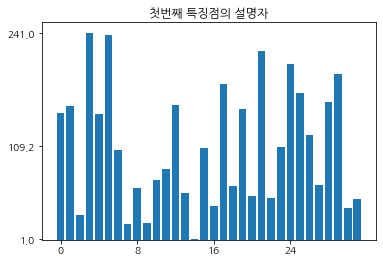

In [14]:
plt.bar(np.arange(len(des[0])), des[0])
plt.xticks(range(0, len(des[0]), 8))
plt.yticks([des[0].min(), des[0].mean(), des[0].max()])
plt.title("첫번째 특징점의 설명자")
plt.show()


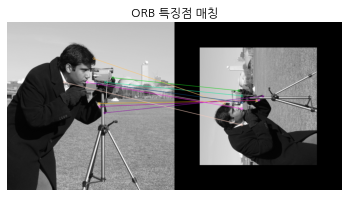

In [15]:
plt.imshow(image_match)
plt.title("ORB 특징점 매칭")
plt.axis("off")
plt.show()